# Explore here

In [5]:
# Your code here

# Paso 1: Carga del conjunto de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pickle import dump
import pickle

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


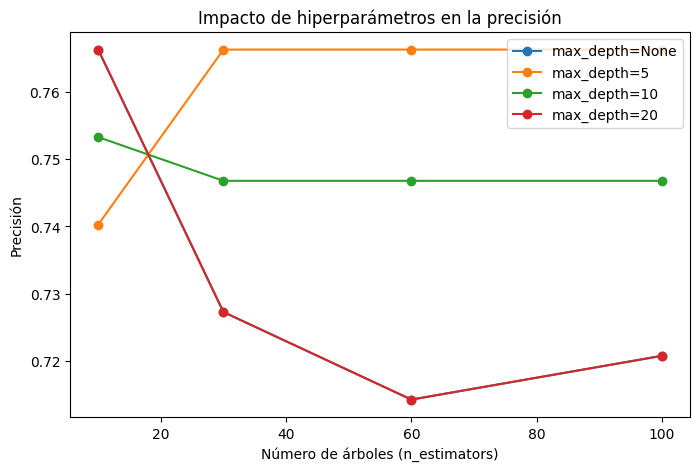

RandomForestClassifier(n_estimators=10, random_state=42)

In [2]:
# Paso 2: Construye un random forest
n_estimators_range = [10, 30, 60, 100]
max_depth_range = [None, 5, 10, 20]
results = {}

for n in n_estimators_range:
    for depth in max_depth_range:
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[(n, depth)] = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8,5))
for depth in max_depth_range:
    accuracies = [results[(n, depth)] for n in n_estimators_range]
    plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', label=f"max_depth={depth}")

plt.xlabel("Número de árboles (n_estimators)")
plt.ylabel("Precisión")
plt.title("Impacto de hiperparámetros en la precisión")
plt.legend()
plt.show()

best_n = max(results, key=results.get)[0]
best_depth = max(results, key=results.get)[1]
best_model = RandomForestClassifier(n_estimators=best_n, max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)


In [6]:
# Paso 3: Guarda el modelo
pickle.dump(best_model, open("../models/ranfor_classifier_nestimators-60_42.pkl", "wb"))
print("Modelo guardado correctamente en formato Pickle")


Modelo guardado correctamente en formato Pickle
